This notebook calculates reconstruction bias and RMSE for the different sampling experiments (reconstructions are compared to the "model truth" of the Large Ensemble Testbed). We show global maps and hovmoller diagrams.

This notebook was created by Thea Hatlen Heimdal, in collaboration with Abby Shaum, Julius Busecke and Val Bennington. 

In [ ]:
import numpy as np
import pandas as pd
import xarray as xr
import pickle
import matplotlib.pyplot as plt 
import seaborn as sns
%run _Val_Mapping.ipynb

In [2]:
# List of all LET members

path_LET = "/local/data/artemis/workspace/theimdal/saildrone/LET_pickle_files/members_LET_dict.pickle"

with open(path_LET,'rb') as handle:
    mems_dict = pickle.load(handle)

## Bring in reconstructions and testbed truth

### SOCAT baseline

In [3]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/SOCAT/models/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_unseen_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_SOCAT_only = xr.concat(datasets_ens, dim='ensemble', join='override') 

### Historical + SOCAT

### Baseline

In [4]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/GO-BGC/models/500_floats/baseline/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_unseen_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_500_historical_baseline = xr.concat(datasets_ens, dim='ensemble', join='override') 

### Biased floats

In [5]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/GO-BGC/models/500_floats/bias4/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_unseen_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_500_historical_bias = xr.concat(datasets_ens, dim='ensemble', join='override') 

### Floats with random uncertainty

In [6]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/GO-BGC/models/500_floats/uncertainty11/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_unseen_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_500_historical_uncertainty = xr.concat(datasets_ens, dim='ensemble', join='override') 

## Optimized + SOCAT

### Baseline

In [7]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/GO-BGC/models/500_floats_optimized/baseline/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_unseen_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_500_optimized_baseline = xr.concat(datasets_ens, dim='ensemble', join='override') 

### Biased floats

In [8]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/GO-BGC/models/500_floats_optimized/bias4/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_unseen_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_500_optimized_bias = xr.concat(datasets_ens, dim='ensemble', join='override') 

### Floats with random uncertainty

In [9]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/GO-BGC/models/500_floats_optimized/uncertainty11/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_unseen_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_500_optimized_uncertainty = xr.concat(datasets_ens, dim='ensemble', join='override') 

### <font color='orange'>Calculate RMSE globally (2000-2016)</font> 

### SOCAT-Baseline

In [10]:
RMSE_socat = xr.ufuncs.sqrt(((ds_SOCAT_only.diff('status'))**2).sel(time=slice("2000-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'time', 'status', 'ylat', 'xlon']))
print(np.nanmean(RMSE_socat))

10.59858165076781


### Historical floats

In [11]:
RMSE_historical_baseline = xr.ufuncs.sqrt(((ds_500_historical_baseline.diff('status'))**2).sel(time=slice("2000-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'time', 'status', 'ylat', 'xlon']))
print(np.nanmean(RMSE_historical_baseline))

9.624671891763349


In [12]:
RMSE_historical_bias = xr.ufuncs.sqrt(((ds_500_historical_bias.diff('status'))**2).sel(time=slice("2000-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'time', 'status', 'ylat', 'xlon']))
print(np.nanmean(RMSE_historical_bias))

9.837422758251888


In [13]:
RMSE_historical_uncertainty = xr.ufuncs.sqrt(((ds_500_historical_uncertainty.diff('status'))**2).sel(time=slice("2000-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'time', 'status', 'ylat', 'xlon']))
print(np.nanmean(RMSE_historical_uncertainty))

9.75809173202923


### Optimized floats

In [14]:
RMSE_optimized_baseline = xr.ufuncs.sqrt(((ds_500_optimized_baseline.diff('status'))**2).sel(time=slice("2000-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'time', 'status', 'ylat', 'xlon']))
print(np.nanmean(RMSE_optimized_baseline))

8.618274240839876


In [15]:
RMSE_optimized_bias = xr.ufuncs.sqrt(((ds_500_optimized_bias.diff('status'))**2).sel(time=slice("2000-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'time', 'status', 'ylat', 'xlon']))
print(np.nanmean(RMSE_optimized_bias))

8.90777215114527


In [16]:
RMSE_optimized_uncertainty = xr.ufuncs.sqrt(((ds_500_optimized_uncertainty.diff('status'))**2).sel(time=slice("2000-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'time', 'status', 'ylat', 'xlon']))
print(np.nanmean(RMSE_optimized_uncertainty))

8.90759728234837


### Make maps

In [10]:
RMSE_socat_map = xr.ufuncs.sqrt(((ds_SOCAT_only.diff('status'))**2).sel(time=slice("2000-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status']))

RMSE_historical_baseline_map = xr.ufuncs.sqrt(((ds_500_historical_baseline.diff('status'))**2).sel(time=slice("2000-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status']))
RMSE_historical_bias_map = xr.ufuncs.sqrt(((ds_500_historical_bias.diff('status'))**2).sel(time=slice("2000-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status']))
RMSE_historical_uncertainty_map = xr.ufuncs.sqrt(((ds_500_historical_uncertainty.diff('status'))**2).sel(time=slice("2000-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status']))

RMSE_optimized_baseline_map = xr.ufuncs.sqrt(((ds_500_optimized_baseline.diff('status'))**2).sel(time=slice("2000-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status']))
RMSE_optimized_bias_map = xr.ufuncs.sqrt(((ds_500_optimized_bias.diff('status'))**2).sel(time=slice("2000-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status']))
RMSE_optimized_uncertainty_map = xr.ufuncs.sqrt(((ds_500_optimized_uncertainty.diff('status'))**2).sel(time=slice("2000-01-01","2016-12-31")).mean(['n_member', 'ensemble', 'status']))

In [11]:
#Change in bias from SOCAT-baseline
map_new_RMSE_historical_baseline = RMSE_historical_baseline_map-RMSE_socat_map
map_new_RMSE_historical_bias = RMSE_historical_bias_map-RMSE_socat_map
map_new_RMSE_historical_uncertainty = RMSE_historical_uncertainty_map-RMSE_socat_map

map_new_RMSE_optimized_baseline = RMSE_optimized_baseline_map-RMSE_socat_map
map_new_RMSE_optimized_bias = RMSE_optimized_bias_map-RMSE_socat_map
map_new_RMSE_optimized_uncertainty = RMSE_optimized_uncertainty_map-RMSE_socat_map

/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
<ipython-input-12-01e64ca3e6f5>:15: RuntimeWarning: Mean of empty slice
  map_sel = np.nanmean(map_new_RMSE_historical_baseline, axis=0)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
<ipython-input-12-01e64ca3e6f5>:25: RuntimeWarning: Mean of empty slice
  map_sel = np.nanmean(map_new_RMSE_historical_bias, axis=0)
<ipython-input-12-01e64ca3e6f5>:35: RuntimeWarning: Mean of empty slice
  map_sel 

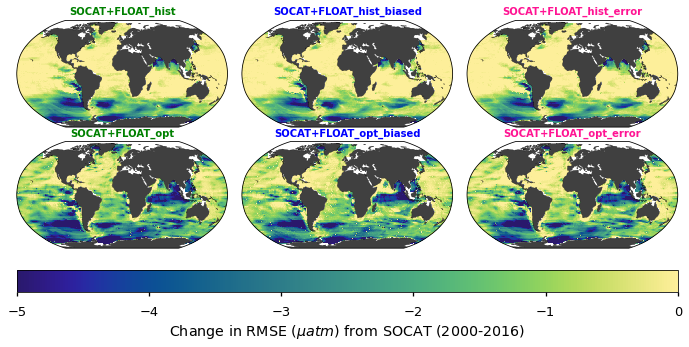

In [12]:
vrange = [-5, 0, 1]
#fig_shape = (1,4)
fig_shape = (2,3)
cmap = cm.cm.haline
lab = f'Change in RMSE ($\mu atm$) from SOCAT (2000-2016)'
   
      
with plt.style.context('seaborn-talk'):
    fig = plt.figure(figsize=(15,5))

    ### Mask
    dia = SpatialMap2(nrows_ncols=fig_shape, fig=fig, cbar_location='bottom', cbar_orientation='horizontal')
    
    
    map_sel = np.nanmean(map_new_RMSE_historical_baseline, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_historical_baseline['ylat'], 
                           lon = map_new_RMSE_historical_baseline['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=0)
    dia.set_title("SOCAT+FLOAT_hist", 0, loc="center", fontweight='bold', color='green', fontsize=10)
    
    map_sel = np.nanmean(map_new_RMSE_historical_bias, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_historical_bias['ylat'], 
                           lon = map_new_RMSE_historical_bias['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=1)
    dia.set_title("SOCAT+FLOAT_hist_biased", 1, loc="center", fontweight='bold', color='blue', fontsize=10)
    
    map_sel = np.nanmean(map_new_RMSE_historical_uncertainty, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_historical_uncertainty['ylat'], 
                           lon = map_new_RMSE_historical_uncertainty['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=2)
    dia.set_title("SOCAT+FLOAT_hist_error", 2, loc="center", fontweight='bold', color='deeppink', fontsize=10)
    
    map_sel = np.nanmean(map_new_RMSE_optimized_baseline, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_optimized_baseline['ylat'], 
                           lon = map_new_RMSE_optimized_baseline['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=3)
    dia.set_title("SOCAT+FLOAT_opt", 3, loc="center", fontweight='bold', color='green', fontsize=10)
    
    map_sel = np.nanmean(map_new_RMSE_optimized_bias, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_optimized_bias['ylat'], 
                           lon = map_new_RMSE_optimized_bias['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=4)
    dia.set_title("SOCAT+FLOAT_opt_biased", 4, loc="center", fontweight='bold', color='blue', fontsize=10)
    
    map_sel = np.nanmean(map_new_RMSE_optimized_uncertainty, axis=0)
    sub = dia.add_plot(lat = map_new_RMSE_optimized_uncertainty['ylat'], 
                           lon = map_new_RMSE_optimized_uncertainty['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=5)
    dia.set_title("SOCAT+FLOAT_opt_error", 5, loc="center", fontweight='bold', color='deeppink', fontsize=10)
    
    
    col = dia.add_colorbar(sub)
    dia.set_cbar_xlabel(col, lab)
    #dia.grid[0].gridlines(draw_labels=True)

#fig.savefig(f"/home/theimdal/RMSE_map_change_2000_2016.jpg",dpi=300, bbox_inches="tight")

### <font color='orange'>Calculate bias globally (2000-2016)</font> 

### SOCAT baseline

In [17]:
bias_SOCAT = ds_SOCAT_only.diff('status').sel(time=slice('2000', '2016')).mean(['n_member', 'ensemble', 'time', 'status', 'ylat', 'xlon'])
print(np.nanmean(bias_SOCAT))

0.6271053881587586


### Historical floats

In [18]:
bias_500_historical_baseline = ds_500_historical_baseline.diff('status').sel(time=slice('2000', '2016')).mean(['n_member', 'ensemble', 'time', 'status', 'ylat', 'xlon'])
print(np.nanmean(bias_500_historical_baseline))

0.19876570794973605


In [19]:
bias_500_historical_bias = ds_500_historical_bias.diff('status').sel(time=slice('2000', '2016')).mean(['n_member', 'ensemble', 'time', 'status', 'ylat', 'xlon'])
print(np.nanmean(bias_500_historical_bias))

1.2506208511927297


In [20]:
bias_500_historical_uncertainty = ds_500_historical_uncertainty.diff('status').sel(time=slice('2000', '2016')).mean(['n_member', 'ensemble', 'time', 'status', 'ylat', 'xlon'])
print(np.nanmean(bias_500_historical_uncertainty))

0.20918939736718412


### Optimized floats

In [21]:
bias_500_optimized_baseline = ds_500_optimized_baseline.diff('status').sel(time=slice('2000', '2016')).mean(['n_member', 'ensemble', 'time', 'status', 'ylat', 'xlon'])
print(np.nanmean(bias_500_optimized_baseline))

0.03447904173111604


In [22]:
bias_500_optimized_bias = ds_500_optimized_bias.diff('status').sel(time=slice('2000', '2016')).mean(['n_member', 'ensemble', 'time', 'status', 'ylat', 'xlon'])
print(np.nanmean(bias_500_optimized_bias))

1.584215440775112


In [23]:
bias_500_optimized_uncertainty = ds_500_optimized_uncertainty.diff('status').sel(time=slice('2000', '2016')).mean(['n_member', 'ensemble', 'time', 'status', 'ylat', 'xlon'])
print(np.nanmean(bias_500_optimized_uncertainty))

0.025726560821891887


## Make maps

In [14]:
bias_socat_map = ds_SOCAT_only.diff('status').sel(time=slice("2000-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])

bias_historical_baseline_map = ds_500_historical_baseline.diff('status').sel(time=slice("2000-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_historical_bias_map = ds_500_historical_bias.diff('status').sel(time=slice("2000-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_historical_uncertainty_map = ds_500_historical_uncertainty.diff('status').sel(time=slice("2000-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])

bias_optimized_baseline_map = ds_500_optimized_baseline.diff('status').sel(time=slice("2000-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_optimized_bias_map = ds_500_optimized_bias.diff('status').sel(time=slice("2000-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])
bias_optimized_uncertainty_map = ds_500_optimized_uncertainty.diff('status').sel(time=slice("2000-01-01","2016-12-31")).mean(["n_member", "ensemble", "status"])

In [15]:
#Change in bias from SOCAT-baseline
map_new_historical_baseline = bias_historical_baseline_map-bias_socat_map
map_new_historical_bias = bias_historical_bias_map-bias_socat_map
map_new_historical_uncertainty = bias_historical_uncertainty_map-bias_socat_map

map_new_optimized_baseline = bias_optimized_baseline_map-bias_socat_map
map_new_optimized_bias = bias_optimized_bias_map-bias_socat_map
map_new_optimized_uncertainty = bias_optimized_uncertainty_map-bias_socat_map

/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
<ipython-input-16-90771c501814>:15: RuntimeWarning: Mean of empty slice
  map_sel = np.nanmean(bias_historical_baseline_map, axis=0)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
<ipython-input-16-90771c501814>:25: RuntimeWarning: Mean of empty slice
  map_sel = np.nanmean(bias_historical_bias_map, axis=0)
<ipython-input-16-90771c501814>:35: RuntimeWarning: Mean of empty slice
  map_sel = np.nan

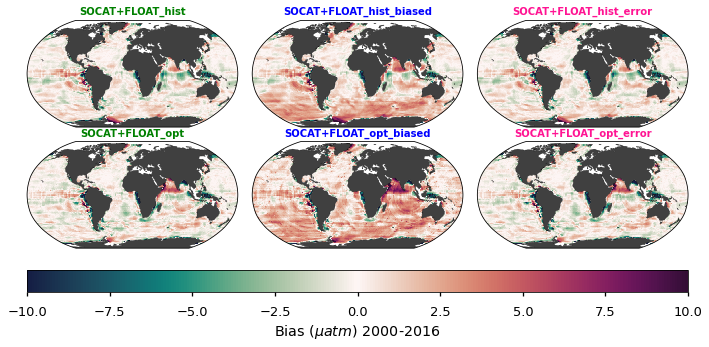

In [16]:
vrange = [-10, 10, 1]
#fig_shape = (1,4)
fig_shape = (2,3)
cmap = cm.cm.curl
lab = f'Bias ($\mu atm$) 2000-2016'
   
      
with plt.style.context('seaborn-talk'):
    fig = plt.figure(figsize=(15,5))

    ### Mask
    dia = SpatialMap2(nrows_ncols=fig_shape, fig=fig, cbar_location='bottom', cbar_orientation='horizontal')
    
    
    map_sel = np.nanmean(bias_historical_baseline_map, axis=0)
    sub = dia.add_plot(lat = bias_historical_baseline_map['ylat'], 
                           lon = bias_historical_baseline_map['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=0)
    dia.set_title("SOCAT+FLOAT_hist", 0, loc="center", fontweight='bold', color='green', fontsize=10)
    
    map_sel = np.nanmean(bias_historical_bias_map, axis=0)
    sub = dia.add_plot(lat = bias_historical_bias_map['ylat'], 
                           lon = bias_historical_bias_map['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=1)
    dia.set_title("SOCAT+FLOAT_hist_biased", 1, loc="center", fontweight='bold', color='blue', fontsize=10)
    
    map_sel = np.nanmean(bias_historical_uncertainty_map, axis=0)
    sub = dia.add_plot(lat = bias_historical_uncertainty_map['ylat'], 
                           lon = bias_historical_uncertainty_map['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=2)
    dia.set_title("SOCAT+FLOAT_hist_error", 2, loc="center", fontweight='bold', color='deeppink', fontsize=10)
    
    map_sel = np.nanmean(bias_optimized_baseline_map, axis=0)
    sub = dia.add_plot(lat = bias_optimized_baseline_map['ylat'], 
                           lon = bias_optimized_baseline_map['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=3)
    dia.set_title("SOCAT+FLOAT_opt", 3, loc="center", fontweight='bold', color='green', fontsize=10)
    
    map_sel = np.nanmean(bias_optimized_bias_map, axis=0)
    sub = dia.add_plot(lat = bias_optimized_bias_map['ylat'], 
                           lon = bias_optimized_bias_map['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=4)
    dia.set_title("SOCAT+FLOAT_opt_biased", 4, loc="center", fontweight='bold', color='blue', fontsize=10)
    
    map_sel = np.nanmean(bias_optimized_uncertainty_map, axis=0)
    sub = dia.add_plot(lat = bias_optimized_uncertainty_map['ylat'], 
                           lon = bias_optimized_uncertainty_map['xlon'], 
                           data = map_sel, 
                           vrange=vrange[0:2],
                           shading='flat',
                           cmap=cmap, 
                           ax=5)
    dia.set_title("SOCAT+FLOAT_opt_error", 5, loc="center", fontweight='bold', color='deeppink', fontsize=10)
    
    
    col = dia.add_colorbar(sub)
    dia.set_cbar_xlabel(col, lab)
    #dia.grid[0].gridlines(draw_labels=True)

#fig.savefig(f"/home/theimdal/bias_map_2000_2016.jpg",dpi=300, bbox_inches="tight")

## Hovmoller

In [17]:
timeline_SOCAT = ds_SOCAT_only.diff('status').sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'xlon', 'status'])

timeline_500_historical_baseline = ds_500_historical_baseline.diff('status').sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'xlon', 'status'])
timeline_500_historical_bias = ds_500_historical_bias.diff('status').sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'xlon', 'status'])
timeline_500_historical_uncertainty = ds_500_historical_uncertainty.diff('status').sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'xlon', 'status'])

timeline_500_optimized_baseline = ds_500_optimized_baseline.diff('status').sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'xlon', 'status'])
timeline_500_optimized_bias = ds_500_optimized_bias.diff('status').sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'xlon', 'status'])
timeline_500_optimized_uncertainty = ds_500_optimized_uncertainty.diff('status').sel(time=slice("1982-01-01","2016-12-31")).groupby("time.year").mean(['n_member', 'ensemble', 'time', 'xlon', 'status'])

/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


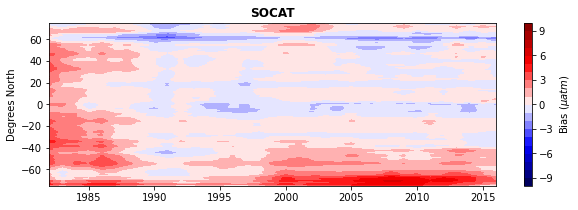

In [18]:
fig = plt.figure(figsize=(10,3))
plt.contourf(range(1982,2017),timeline_SOCAT.ylat,(timeline_SOCAT).transpose(),levels=np.linspace(-10,10,21),cmap='seismic')
plt.colorbar(label='Bias ($\mu atm$)')
plt.ylim(-75,75)
plt.ylabel("Degrees North")
plt.title("SOCAT", fontweight="bold")
#fig.savefig(f"/home/theimdal/bias_map_SOCAT.jpg",dpi=300, bbox_inches="tight")

/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/theimdal/.conda/envs/cesm_play/lib/python3.8/site-packages/dask/array/numpy_compat.p

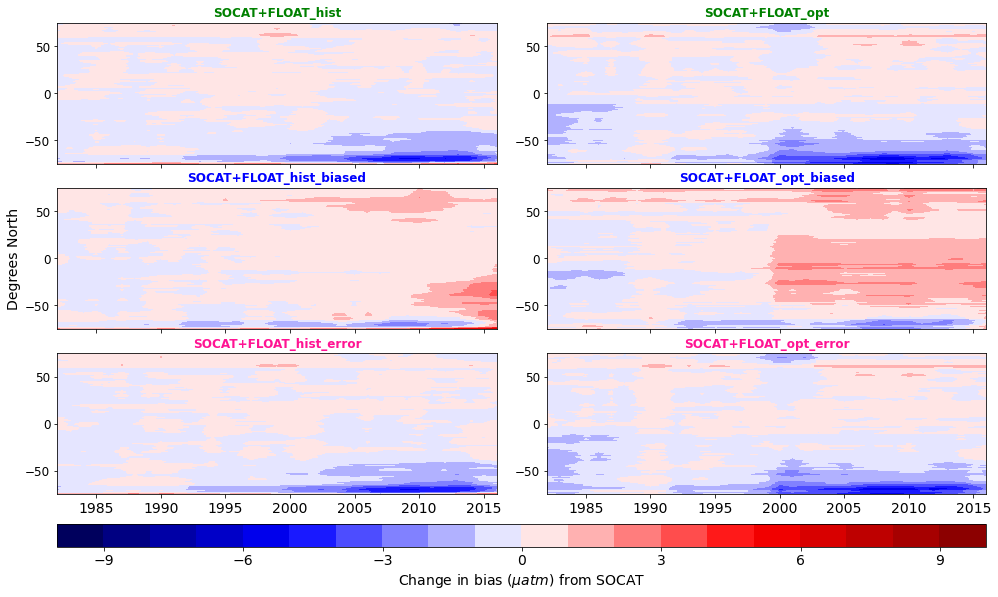

In [19]:
fig, ax = plt.subplots(3,2, figsize=(14,9), sharex=True)

map_plot = ax[0,0].contourf(range(1982,2017),timeline_500_historical_baseline.ylat,(timeline_500_historical_baseline-timeline_SOCAT).transpose(),levels=np.linspace(-10,10,21),cmap='seismic') #levels, cmap and extend are optional
ax[0,0].set_ylim(-75,75)
ax[0,0].yaxis.set_tick_params(labelsize=12)
ax[0,0].set_title('SOCAT+FLOAT_hist', fontsize=12, fontweight="bold", color='green')

ax[1,0].contourf(range(1982,2017),timeline_500_historical_bias.ylat,(timeline_500_historical_bias-timeline_SOCAT).transpose(),levels=np.linspace(-10,10,21),cmap='seismic')
ax[1,0].set_ylabel("Degrees North", fontsize=14)
ax[1,0].set_ylim(-75,75)
ax[1,0].yaxis.set_tick_params(labelsize=12)
ax[1,0].set_title('SOCAT+FLOAT_hist_biased', fontsize=12, fontweight="bold", color='blue')

ax[2,0].contourf(range(1982,2017),timeline_500_historical_uncertainty.ylat,(timeline_500_historical_uncertainty-timeline_SOCAT).transpose(),levels=np.linspace(-10,10,21),cmap='seismic')
ax[2,0].set_ylim(-75,75)
ax[2,0].yaxis.set_tick_params(labelsize=12)
ax[2,0].xaxis.set_tick_params(labelsize=14)
ax[2,0].set_title('SOCAT+FLOAT_hist_error', fontsize=12, fontweight="bold", color='deeppink')

map_plot = ax[0,1].contourf(range(1982,2017),timeline_500_optimized_baseline.ylat,(timeline_500_optimized_baseline-timeline_SOCAT).transpose(),levels=np.linspace(-10,10,21),cmap='seismic') #levels, cmap and extend are optional
ax[0,1].set_ylim(-75,75)
ax[0,1].yaxis.set_tick_params(labelsize=12)
ax[0,1].set_title('SOCAT+FLOAT_opt', fontsize=12, fontweight="bold", color='green')

ax[1,1].contourf(range(1982,2017),timeline_500_optimized_bias.ylat,(timeline_500_optimized_bias-timeline_SOCAT).transpose(),levels=np.linspace(-10,10,21),cmap='seismic')
ax[1,1].set_ylim(-75,75)
ax[1,1].yaxis.set_tick_params(labelsize=12)
ax[1,1].set_title('SOCAT+FLOAT_opt_biased', fontsize=12, fontweight="bold", color='blue')

ax[2,1].contourf(range(1982,2017),timeline_500_optimized_uncertainty.ylat,(timeline_500_optimized_uncertainty-timeline_SOCAT).transpose(),levels=np.linspace(-10,10,21),cmap='seismic')
ax[2,1].set_ylim(-75,75)
ax[2,1].yaxis.set_tick_params(labelsize=12)
ax[2,1].xaxis.set_tick_params(labelsize=14)
ax[2,1].set_title('SOCAT+FLOAT_opt_error', fontsize=12, fontweight="bold", color='deeppink')

plt.tight_layout()

cbar = plt.colorbar(map_plot, orientation='horizontal', aspect=40, pad=0.05, ax=ax.ravel().tolist())
cbar.set_label('Change in bias ($\mu atm$) from SOCAT', fontsize=14)
font_size = 14
cbar.ax.tick_params(labelsize=font_size)

#fig.savefig(f"/home/theimdal/bias_map_change_1982_2016.jpg",dpi=300, bbox_inches="tight")